## Ejercicio 10

In [ ]:
#Esto convierte el video a un formato más liviano de trabajo
!ffmpeg -y -i Milano.mp4 -vf "scale=600:-2" -an -t 30 Milano1.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!pip install -q supervision ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 23.3 MB/s eta 0:00:00


In [ ]:


# Importar las librerías necesarias
import supervision as sv  # Librería para el seguimiento de objetos
from ultralytics import YOLO  # Librería para la detección de objetos con YOLO
import numpy as np  # Librería para operaciones matemáticas y manejo de arrays

# Definir rutas de los videos de entrada y salida, y el nombre del modelo
SOURCE_VIDEO_PATH = "Milano1.mp4"  # Ruta al video de entrada
TARGET_VIDEO_PATH = "Milano1.mp4_600_tracking.mp4"  # Ruta donde se guardará el video con seguimiento de objetos
MODEL_NAME = "yolov8x.pt"  # Nombre del modelo preentrenado de YOLO a utilizar

# Inicializar el modelo de detección y el rastreador de objetos
model = YOLO(MODEL_NAME)  # Cargar el modelo de YOLO
tracker = sv.ByteTrack()  # Inicializar ByteTrack para el seguimiento de objetos

# Inicializar los anotadores para las cajas delimitadoras y las etiquetas
bounding_box_annotator = sv.BoundingBoxAnnotator()  # Para dibujar cajas delimitadoras
label_annotator = sv.LabelAnnotator()  # Para dibujar etiquetas (IDs de seguimiento)

# Definir la función de callback que procesa cada frame
def callback(frame: np.ndarray, index: int) -> np.ndarray:
    results = model(frame)[0]  # Detectar objetos en el frame actual con YOLO
    detections = sv.Detections.from_ultralytics(results)  # Convertir resultados a formato de supervision
    detections = tracker.update_with_detections(detections)  # Actualizar el estado del rastreador con las detecciones

    labels = [f"#{tracker_id}" for tracker_id in detections.tracker_id]  # Crear etiquetas con los IDs de seguimiento

    # Anotar el frame con bounding boxes y etiquetas
    annotated_frame = bounding_box_annotator.annotate(
        scene=frame.copy(), detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame, detections=detections, labels=labels)
    return annotated_frame  # Devolver el frame anotado

# Procesar el video: leer, aplicar callback a cada frame y guardar el resultado
sv.process_video(
    source_path=SOURCE_VIDEO_PATH,  # Ruta del video original
    target_path=TARGET_VIDEO_PATH,  # Ruta del video resultante
    callback=callback  # Función de callback para procesar cada frame
    )

100%|██████████| 131M/131M [00:01<00:00, 127MB/s]



0: 384x640 6 persons, 2 bicycles, 13 cars, 4 traffic lights, 1 stop sign, 1 backpack, 2519.0ms
Speed: 18.1ms preprocess, 2519.0ms inference, 16.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 3 bicycles, 13 cars, 4 traffic lights, 1 stop sign, 1 backpack, 2359.5ms
Speed: 3.9ms preprocess, 2359.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 4 bicycles, 13 cars, 4 traffic lights, 1 stop sign, 1 backpack, 2847.1ms
Speed: 3.5ms preprocess, 2847.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 3 bicycles, 13 cars, 4 traffic lights, 1 stop sign, 2895.4ms
Speed: 4.9ms preprocess, 2895.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 3 bicycles, 13 cars, 4 traffic lights, 1 stop sign, 2 backpacks, 2443.2ms
Speed: 3.2ms preprocess, 2443.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 2 bicycles,

In [ ]:
!pip install -q mediapy
import mediapy as media
url = 'Milano1.mp4_600_tracking.mp4'
video = media.read_video(url)
media.show_video(video)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


## Ejercicio 11

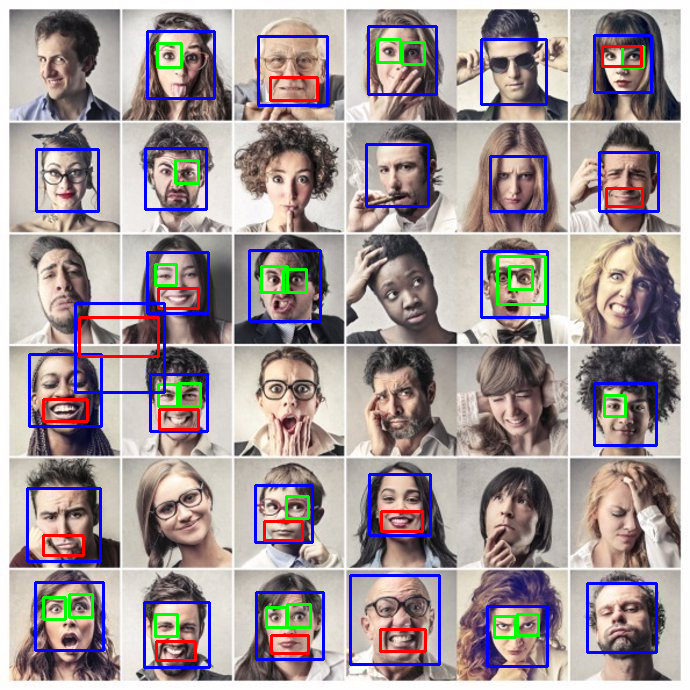

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Cargar los clasificadores preentrenados
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Cargar la imagen y convertirla a escala de grises
image = cv2.imread('fotonoticia.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar rostros en la imagen
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    # Detectar ojos dentro del área del rostro
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    # Detectar sonrisa dentro del área del rostro
    mouth = smile_cascade.detectMultiScale(roi_gray)
    for (mx,my,mw,mh) in mouth:
        cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)

# Mostrar la imagen resultante
cv2_imshow(image)

Reconoce de manera completa muy pocas caras. La calidad de la foto no es muy buena, pero parece que hay también deficiencia en el modelo.

## Ejercicio 12


In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 9.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=6b205e94c2bb03f74fe45ca625840c5ce3b8e8b1f977ff8b366a04d2b4ce0c7f
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [ ]:
from deepface import DeepFace

# Modelos soportados
models = [
  "VGG-Face",
  "Facenet",
  "Facenet512",
  "OpenFace",
  "DeepFace",
  "DeepID",
  "ArcFace",
  "Dlib",
  "SFace",
]

# Métodos disponibles para el cálculo de distancia
metrics = ["cosine", "euclidean", "euclidean_l2"]

# Ruta de las imágenes que deseas comparar
image1 = "imagen.jpg"
image2 = "imagen1.jpg"

# Verificar si las imágenes pertenecen a la misma persona
result = DeepFace.verify(img1_path = image1, img2_path = image2, model_name=models[6], distance_metric = metrics[1])

print("¿Son la misma persona?: ", result["verified"])


¿Son la misma persona?:  True


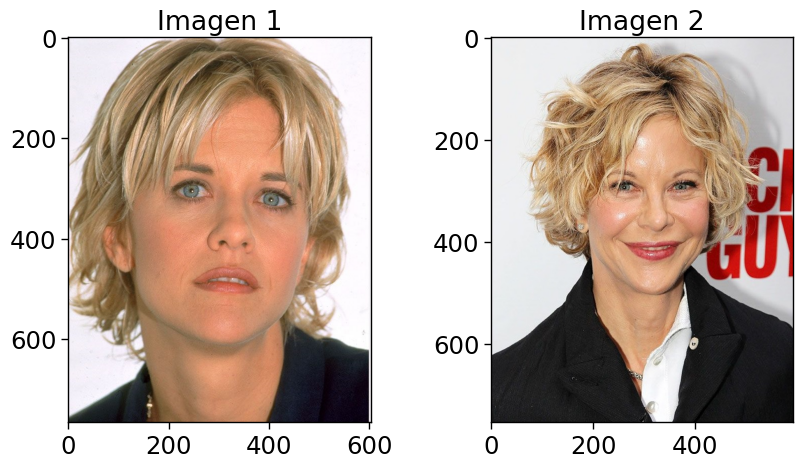

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta de las imágenes
imagen1_path = 'imagen.jpg'
imagen2_path = 'imagen1.jpg'

# Cargando las imágenes
imagen1 = mpimg.imread(imagen1_path)
imagen2 = mpimg.imread(imagen2_path)

# Mostrar las imágenes juntas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen1)
plt.title('Imagen 1')

plt.subplot(1, 2, 2)
plt.imshow(imagen2)
plt.title('Imagen 2')

plt.show()

Para este ejercicio intenté con imágenes de pefil y da un error al intentar leerlas, con todos los métodos y modelos. El error es: "ValueError: Face could not be detected in left1.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False."

## Ejercicio 13

In [ ]:
%%capture

!pip install py-feat

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 6.7 MB/s eta 0:00:00


100%|██████████| 1/1 [00:04<00:00,  4.42s/it]


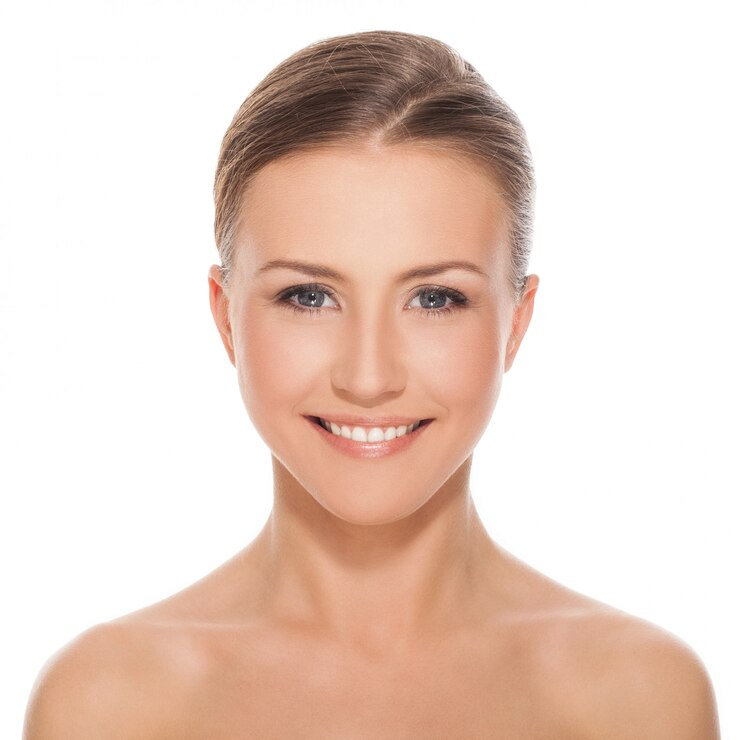

In [ ]:
# Importa la clase Detector de la librería feat, utilizada para detectar características faciales en imágenes.
from feat import Detector
# Importa la función imshow del módulo plotting de feat, que permite mostrar imágenes. No se usa en este fragmento de código.
from feat.plotting import imshow
from google.colab.patches import cv2_imshow
import cv2

# Crea un objeto Detector con configuraciones específicas para los modelos de detección de rostro, puntos de referencia,
# unidades de acción (AU), emociones y pose del rostro.
detector = Detector(
    face_model="retinaface", # Modelo para la detección de rostros. RetinaFace es conocido por su precisión.
    landmark_model="mobilefacenet", # Modelo para detectar puntos de referencia en el rostro, como ojos y boca.
    au_model='xgb', # Modelo basado en XGBoost para identificar las unidades de acción, que son microexpresiones faciales.
    emotion_model="resmasknet", # Modelo para clasificar emociones basado en las expresiones faciales detectadas.
    facepose_model="img2pose", # Modelo para estimar la orientación del rostro en la imagen.
)

# Define la ruta de la imagen a analizar.
image_path = "joven-mujer-caucasica-feliz.jpg"

# Utiliza el detector para analizar la imagen especificada y almacenar los resultados de la detección en single_face_prediction.
# Esto incluye la detección de rostro, puntos de referencia, unidades de acción, emociones y la orientación del rostro.
single_face_prediction = detector.detect_image(image_path)

# Muestra la imagen original
cv2_imshow(cv2.imread(image_path))

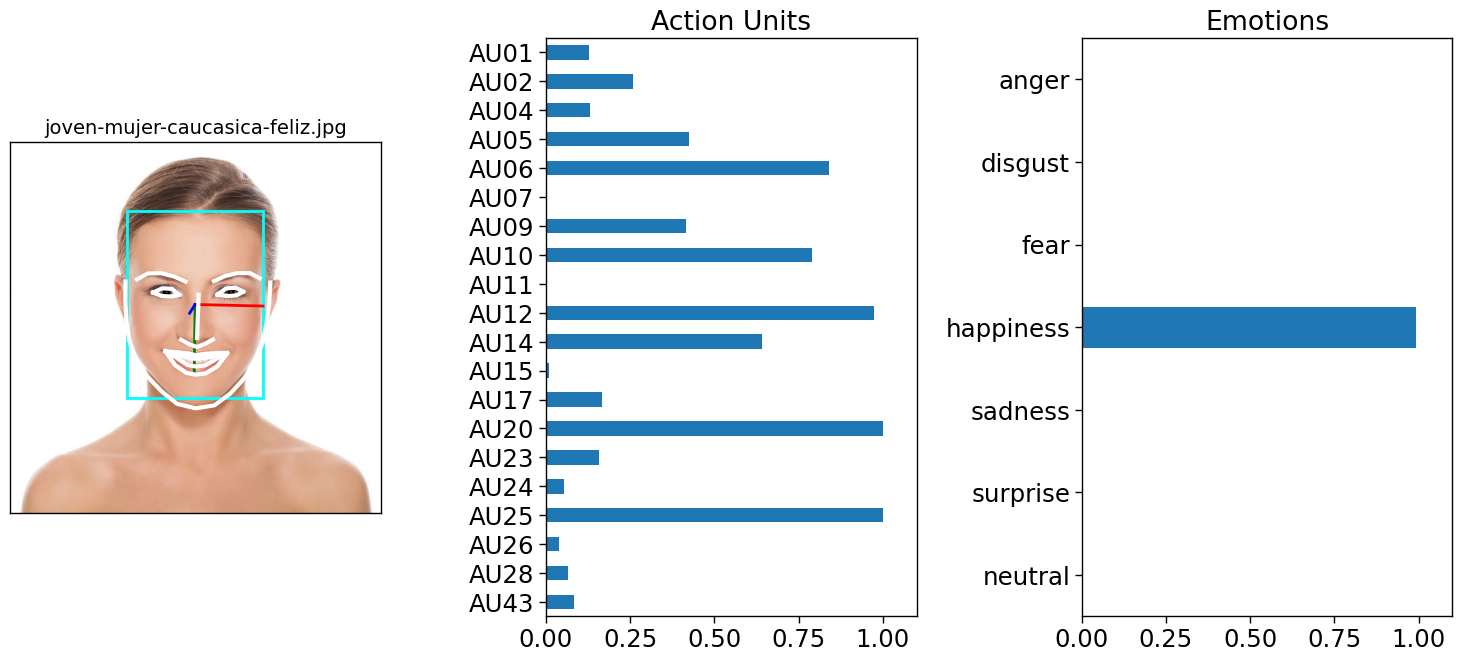

In [ ]:
# Podemos usar el método .plot_detections() para generar una figura resumen de los rostros detectados,
# unidades de acción y emociones. Siempre devuelve una lista de figuras de matplotlib.
figs = single_face_prediction.plot_detections(poses=True)

In [ ]:
# Emociones del rostro
single_face_prediction.emotions


anger   disgust      fear  happiness  sadness  surprise   neutral
0  0.000632  0.000494  0.000067   0.992821  0.00003  0.002344  0.003613

In [ ]:
# Acceder a los valores de las emociones
valores_emociones = single_face_prediction.emotions.values
nombres_emociones = single_face_prediction.emotions.columns

In [ ]:
import numpy as np
# Obtener el índice del valor máximo
indice_maximo = np.argmax(valores_emociones)
valor = nombres_emociones[indice_maximo]

In [ ]:
valor

'happiness'

In [ ]:
import emoji
# Lista de emojis
emojis = {
   'anger': emoji.emojize("\U0001F620"),
   'disgust':	 emoji.emojize("\U0001F626"),
    'fear': emoji.emojize("\U0001F631"),
    'happiness': emoji.emojize("\U0001F600"),
    'sadness': emoji.emojize("\U0001F622"),
    'surprise': emoji.emojize("\U0001F632"),
    'neutral': emoji.emojize("\U0001F610")
}



In [ ]:
print("Emoción: ", valor + emojis[valor])


Emoción:  happiness😀
